<a href="https://colab.research.google.com/github/samula98/proj2_00/blob/main/proj2_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction


The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class.
The goal is to minimize the RMS ***percentage*** error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.



Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.



Be sure to go through the whole data science process and document as such in your Jupyter notebook.



This project will have less direct "To Do" guidance and the progression through the data science process will be more individualized this time around.
We will talk about all the issues during class so you're not going to be out on a ledge with this one, I just want to move you towards performing a data science project on your own eventually.



A data dictionary file is available at AWS S3 at [Housing Data Dictionary]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf ).

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
housing_df = pd.read_csv(url)

In [21]:
sales_df = housing_df.copy()

In [3]:
housing_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [4]:
housing_df.tail()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000
2636,528292060,60,RL,41.0,12460,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,225000


<Axes: >

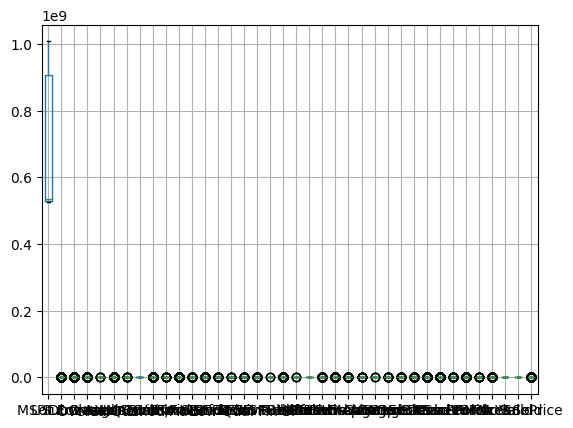

In [5]:
housing_df.boxplot()

array([[<Axes: title={'center': 'PID'}>,
        <Axes: title={'center': 'MS SubClass'}>,
        <Axes: title={'center': 'Lot Frontage'}>,
        <Axes: title={'center': 'Lot Area'}>,
        <Axes: title={'center': 'Overall Qual'}>,
        <Axes: title={'center': 'Overall Cond'}>],
       [<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Year Remod/Add'}>,
        <Axes: title={'center': 'Mas Vnr Area'}>,
        <Axes: title={'center': 'BsmtFin SF 1'}>,
        <Axes: title={'center': 'BsmtFin SF 2'}>,
        <Axes: title={'center': 'Bsmt Unf SF'}>],
       [<Axes: title={'center': 'Total Bsmt SF'}>,
        <Axes: title={'center': '1st Flr SF'}>,
        <Axes: title={'center': '2nd Flr SF'}>,
        <Axes: title={'center': 'Low Qual Fin SF'}>,
        <Axes: title={'center': 'Gr Liv Area'}>,
        <Axes: title={'center': 'Bsmt Full Bath'}>],
       [<Axes: title={'center': 'Bsmt Half Bath'}>,
        <Axes: title={'center': 'Full Bath'}>,
        <Axe

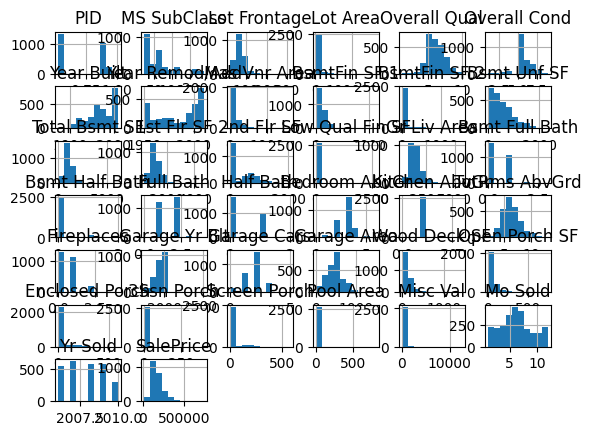

In [6]:
housing_df.hist()

In [7]:
housing_df.shape

(2637, 81)

In [8]:
housing_df.isnull() #checking for all the nulls

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2633,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2634,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2635,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [9]:
housing_df.isnull().sum().sum() # sum of all the nulls

14208

In [10]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [11]:
housing_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


In [12]:
# check for nulls by category
housing_df.isnull()

In [20]:
# finding categorical columns
cat_columns = housing_df.select_dtypes(include = ['object']).columns
cat_columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [23]:
# data series
ds_180 = (~sales_df['Alley'].isna()).sum()
ds_180

180

In [24]:
len(sales_df['Alley']) - sales_df['Alley'].isnull().sum()

180

In [25]:
sales_df['Alley'].value_counts().sum()

180

180

In [18]:
housing_clean = housing_df.copy()
housing_clean.isnull().sum()

,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,449
Lot Area,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0
